In [ ]:
import pandas as pd
from collections import Counter
from google.colab import drive
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
print('=' * 50)
print('빈도 추출 프로그램')
print('=' * 50)

빈도 추출 프로그램


input name : parsed_toji.txt
token: 74283
type: 33005
token/type = 2.25
type/token = 0.44
           토큰   빈도   백분율   누적백분율
0           그  413 0.556   0.556
1           안  388 0.522   1.078
2        있었다.  361 0.486   1.564
3           한  252 0.339   1.904
4           것  241 0.324   2.228
...       ...  ...   ...     ...
33000    죽겠다는    1 0.001  99.995
33001  으름장이다.    1 0.001  99.996
33002  침소봉대해서    1 0.001  99.997
33003    곧이들은    1 0.001  99.999
33004     쫓겨날    1 0.001 100.000

[33005 rows x 4 columns]


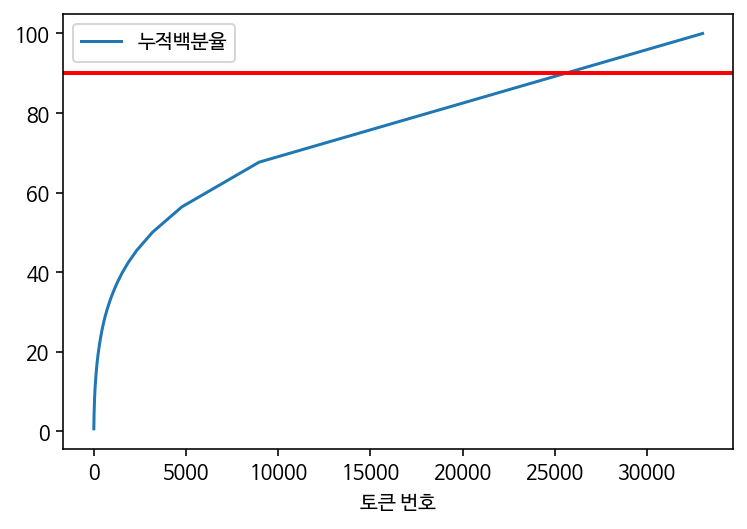

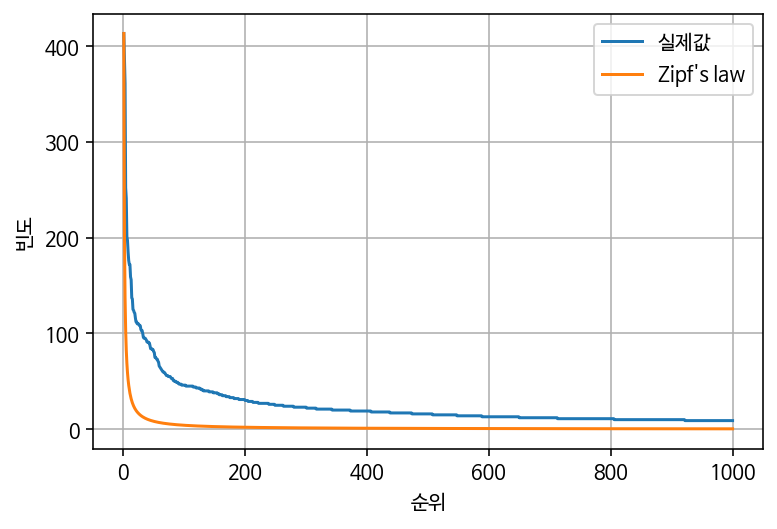

In [ ]:
# =============================================================================
#    파일 입력
# =============================================================================
try:
    base_path = "/content/"
    in_fname = input('input name : ')
    with open(base_path+in_fname, encoding='utf-8') as f:
        lines = [line.strip() for line in f]
# =============================================================================
#    빈도 추출    
# =============================================================================
    token_cnt = Counter(eojeol for line in lines for eojeol in line.split(' '))
    types = len(token_cnt)
    tokens = sum(token_cnt.values())
    
    print('=' * 50)
    print('token:', tokens)
    print('type:', types)
    print('token/type = %.2f' % (tokens/types))
    print('type/token = %.2f' % (types/tokens))
    
    print('=' * 50)

# =============================================================================
#    토큰 목록 출력
# ============================================================================= 
    sorted_token_cnt = sorted(token_cnt.items(), key=lambda x:x[1], reverse=True)        

    pd.options.display.float_format = '{:.3f}'.format    
    token_pd = pd.DataFrame.from_dict(sorted_token_cnt)    
    token_pd.rename(columns={token_pd.columns[0]:'토큰', token_pd.columns[1]:'빈도' }, inplace=True)
    token_pd['백분율'] = token_pd['빈도'] / tokens * 100 
    token_pd['누적백분율'] = token_pd['빈도'].cumsum() / tokens * 100
    
    print(token_pd)    
    token_pd.to_csv('freq.csv', encoding='cp949', index = None, header = True)       

# =============================================================================
#    누적백분율 그래프 출력     
# =============================================================================
    token_pd.plot(y='누적백분율')
    plt.axhline(y=90, color='r', linewidth=2) #y축의 값이 90인 곳에 수평선
    plt.xlabel('토큰 번호')    
    fic = plt.gcf()
    plt.show()
    fic.savefig('freq.pdf')
    
# =============================================================================
#     Zipf.law 그래프 출력
# =============================================================================
    ranks = []
    freqs = []    
    freqs2 = []
    rank = 1
    for freq in token_pd['빈도'][:1000]:
        ranks.append(rank)
        rank += 1
        freqs.append(freq)
        
    for i in range(1000):
        freqs2.append(token_pd['빈도'][0] / (i + 1))
        
    plt.plot(ranks, freqs, label='실제값')
    plt.plot(ranks, freqs2, label="Zipf's law")
    plt.xlabel('순위')    
    plt.ylabel('빈도')    
    plt.legend()
    fic = plt.gcf()
    plt.grid(True)
    plt.show()
    fic.savefig('zipf.pdf')


except FileNotFoundError:
    print('해당 파일을 찾을 수 없습니다.')
except UnicodeDecodeError:
    print('문서 인코딩을 확인하세요. utf-8 문서만 처리 가능합니다.')